In [1]:
import pandas as pd

In [5]:
df = pd.read_csv('QueryResults.csv')

In [8]:
df.head()

,m,TagName,Unnamed: 2
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


In [9]:
# change column names
df.columns = ['Date','Tag','Posts']

In [10]:
df.head()

,Date,Tag,Posts
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


In [12]:
# check for nulls
df.count()

Date     1991
Tag      1991
Posts    1991
dtype: int64

In [19]:
# number of posts per tag
df.groupby(by=['Tag','Date']).sum().sort_values(by='Posts',ascending=False)

Posts
Tag    Date                      
python 2020-05-01 00:00:00  34478
       2020-04-01 00:00:00  32605
       2020-06-01 00:00:00  31817
       2020-07-01 00:00:00  31261
       2020-03-01 00:00:00  26673
...                           ...
swift  2010-07-01 00:00:00      1
       2010-09-01 00:00:00      1
       2013-05-01 00:00:00      1
       2011-05-01 00:00:00      1
       2009-02-01 00:00:00      1

[1991 rows x 1 columns]

In [21]:
# grouping by language
df.groupby(by=['Tag']).sum().sort_values(by='Posts',ascending=False)

,Posts
Tag,
javascript,2056510
java,1696403
python,1496210
c#,1423530
php,1361988
c++,684210
r,356799
c,336042
swift,273055


In [22]:
# counting the number of months that had > 0 entries
df.groupby(by='Tag').count().sort_values(by='Posts',ascending=False)

,Date,Posts
Tag,,
c#,145,145
assembly,144,144
c,144,144
c++,144,144
delphi,144,144
java,144,144
javascript,144,144
perl,144,144
php,144,144


In [24]:
df.Date = pd.to_datetime(df.Date)

In [26]:
df.head()

,Date,Tag,Posts
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


In [29]:
# pivot tables -- creating them yourself makes you appreciate excel
pivot = df.pivot(index='Date',columns='Tag',values='Posts')
pivot.head()

Tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN


In [31]:
pivot.fillna(0,inplace=True)

In [34]:
pivot.head()

Tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0


In [35]:
import matplotlib.pyplot as plt

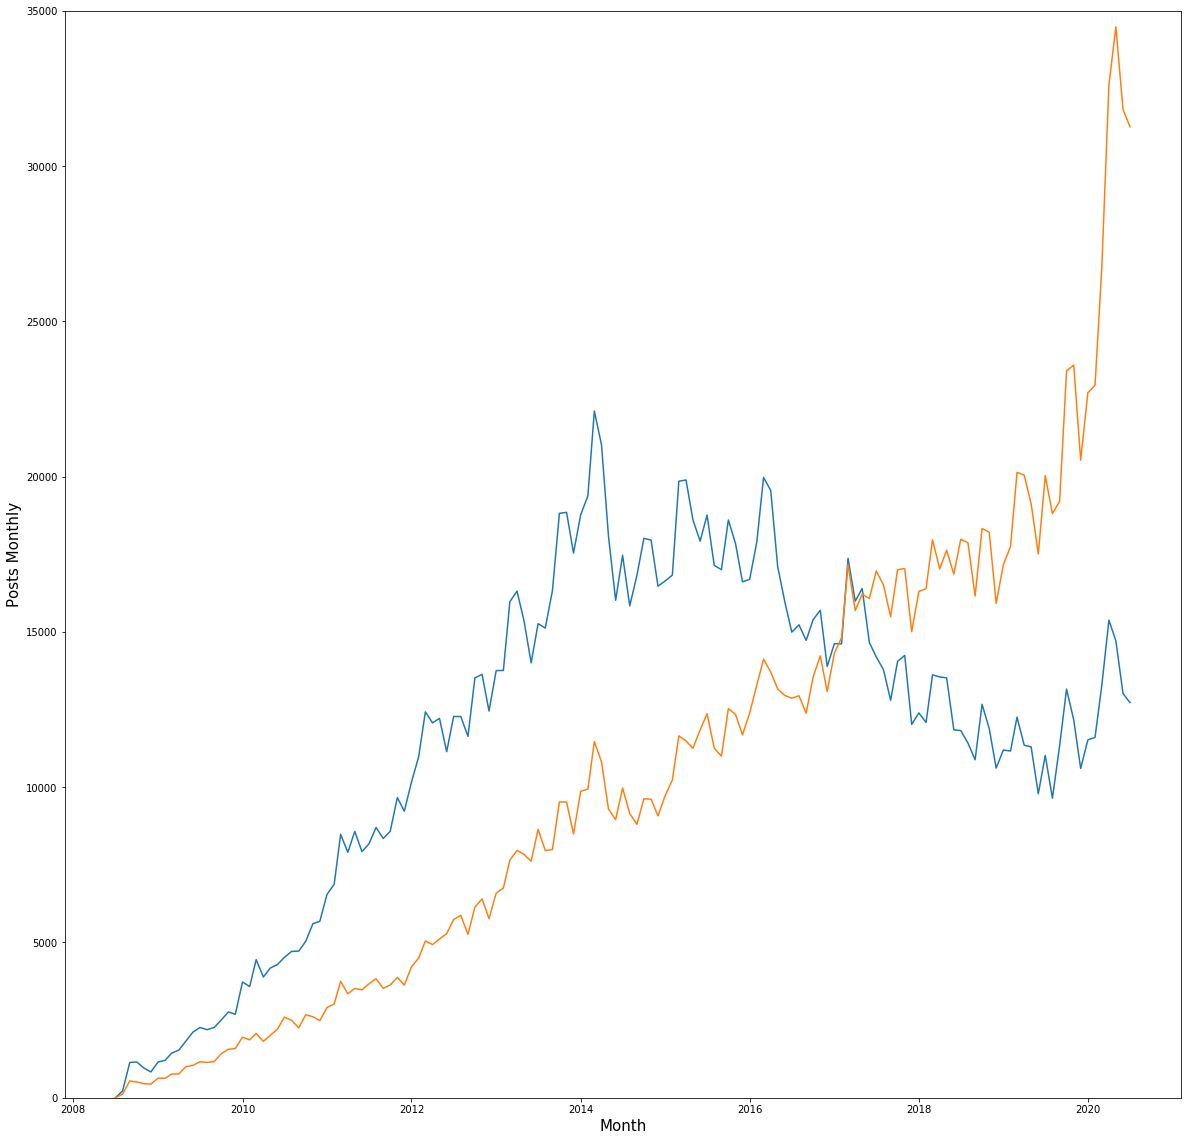

In [57]:
# plot two lines
x = pivot.index
y = pivot['java']
y2 = pivot['python']

# note you must put plot last so that the atrributes apply before you actually plot
#plt.xticks(fontsize=10)

plt.figure(figsize=(20,20))
plt.ylim(0,35000)
plt.xlabel('Month',fontsize=15)
plt.ylabel('Posts Monthly',fontsize=15)
plt.plot(x,y)
plt.plot(x,y2)

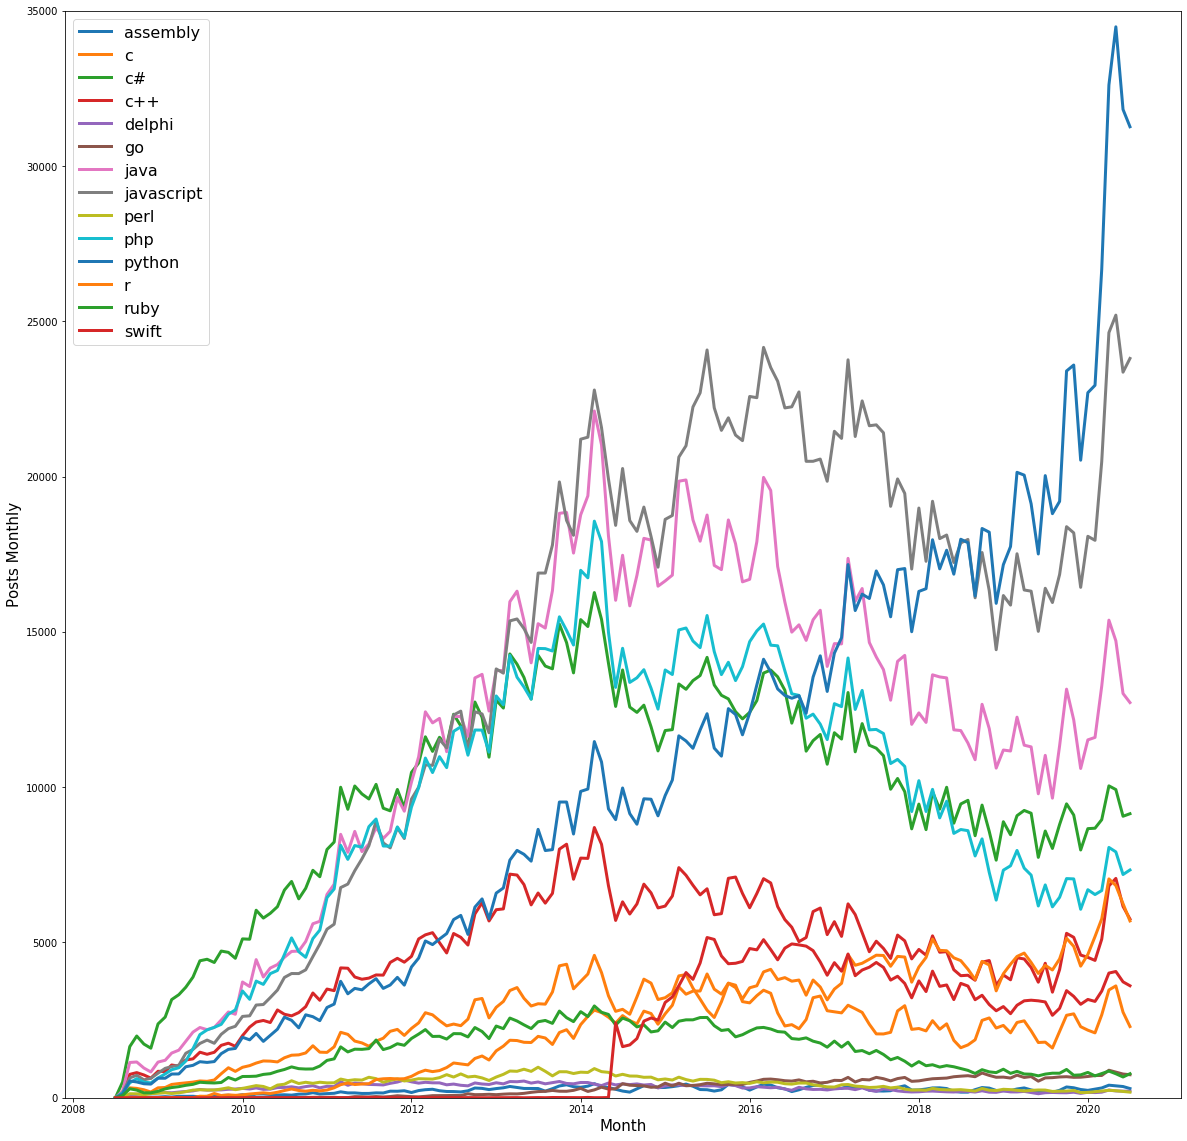

In [65]:
x = pivot.index
#y = pivot[column]

# note you must put plot last so that the atrributes apply before you actually plot
#plt.xticks(fontsize=10)

plt.figure(figsize=(20,20))
plt.ylim(0,35000)
plt.xlabel('Month',fontsize=15)
plt.ylabel('Posts Monthly',fontsize=15)
for column in pivot.columns:
    plt.plot(x,pivot[column],linewidth=3,label=pivot[column].name)
    
    
plt.legend(fontsize=16)

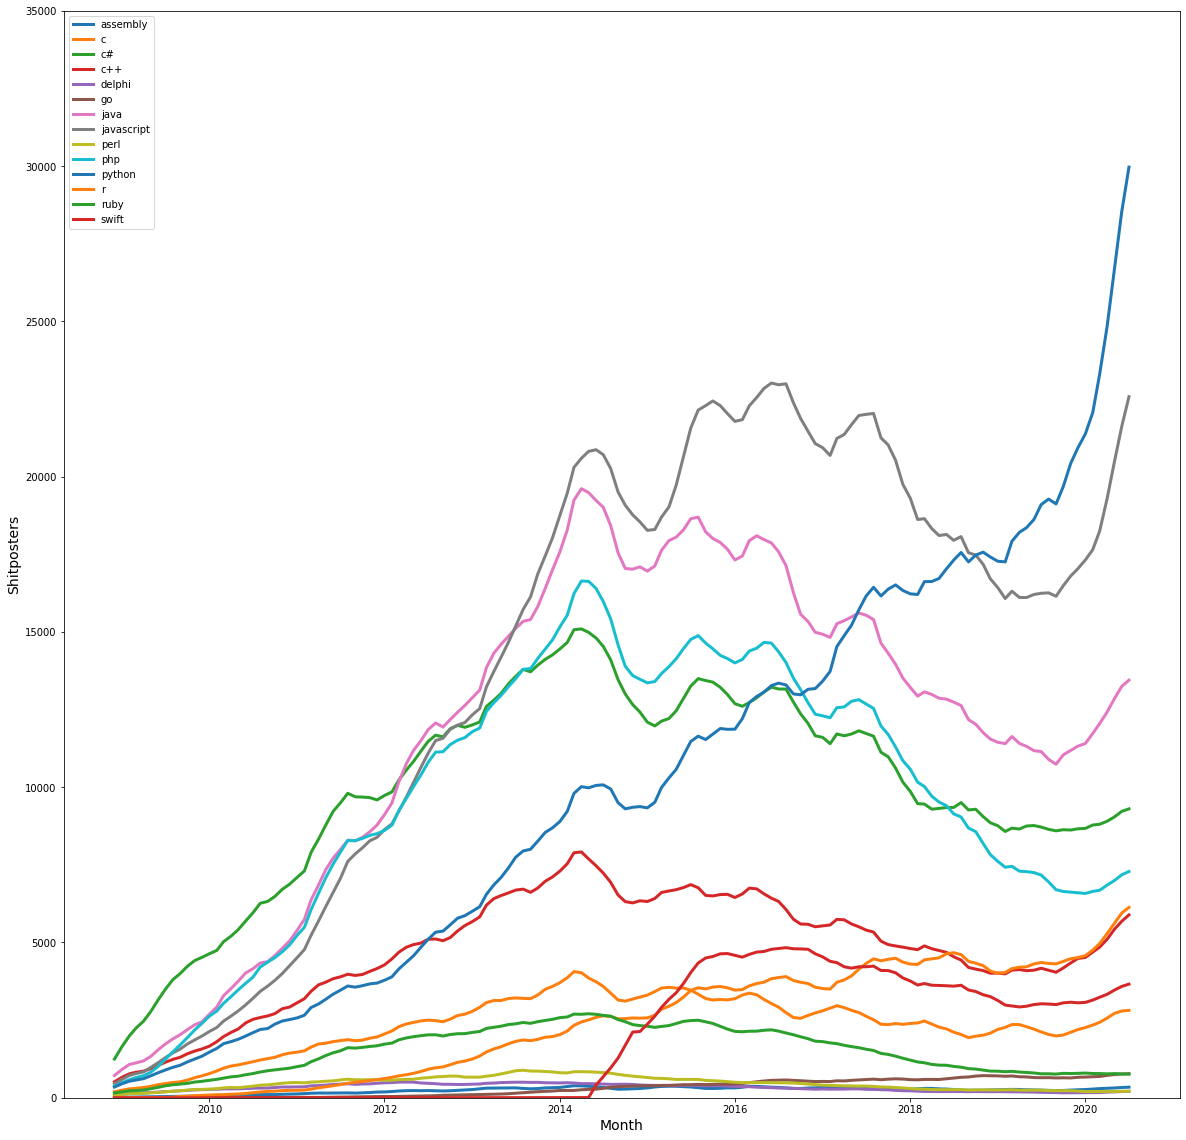

In [78]:
# rolling average


roll = pivot.rolling(window=6).mean()


plt.figure(figsize=(20,20))
plt.xlabel('Month',fontsize=14)
plt.ylabel('Shitposters',fontsize=14)
plt.ylim(0,35000)

for column in roll.columns:
    plt.plot(roll.index, roll[column], linewidth=3, label=roll[column].name)
    
plt.legend()

In [79]:
pivot.head()

Tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0


In [82]:
pivot.groupby(by='Date').sum()

Tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0
